<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/pytorch_neural_network(%EC%8B%A0%EA%B2%BD%EB%A7%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [2]:
data = torch.randn(10,5)
layer = nn.Linear(5,2)
layer

Linear(in_features=5, out_features=2, bias=True)

In [3]:
out = layer(data)
out.shape

torch.Size([10, 2])

In [4]:
out

tensor([[ 0.2842,  0.4827],
        [ 0.9383, -1.0137],
        [ 0.6439, -0.5263],
        [ 1.2925, -0.4500],
        [ 0.0526,  0.0243],
        [-0.8171,  0.8621],
        [ 0.6287,  0.0358],
        [ 0.3755, -0.9149],
        [ 0.1687,  1.2950],
        [-0.2582, -0.3219]], grad_fn=<AddmmBackward0>)

In [5]:
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [6]:
data_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,),std=(0.5,))
                                      ])

traindata = datasets.MNIST(root='/content',train=True,download=True,transform=data_transforms)
testdata = datasets.MNIST(root='/content',train=False,download=True,transform=data_transforms)

train_loader = DataLoader(traindata,batch_size=4,shuffle=True)
test_loader = DataLoader(testdata,batch_size=4,shuffle=True)

images, labels = next(iter(train_loader))
image = images[0]

100%|██████████| 9912422/9912422 [00:00<00:00, 91426026.44it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21585120.07it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26721370.08it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1230733.82it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [7]:
image.shape

torch.Size([1, 28, 28])

In [9]:
layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1)
weight = layer.weight.detach()
bias = layer.bias.detach()

In [10]:
out = layer(image.unsqueeze(0)) #[1,28,28] -> [1,1,28,28]
out.shape

torch.Size([1, 10, 26, 26])

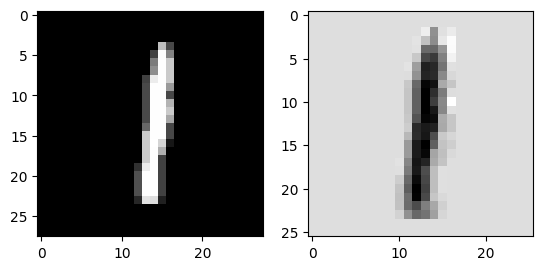

In [14]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(image.squeeze(),cmap='gray')

plt.subplot(122)
plt.imshow(out.detach()[0,9,:,:],cmap='gray')
plt.show()

In [15]:
import torch.nn.functional as F

In [16]:
pool = F.max_pool2d(out,2,2)
pool.shape

torch.Size([1, 10, 13, 13])

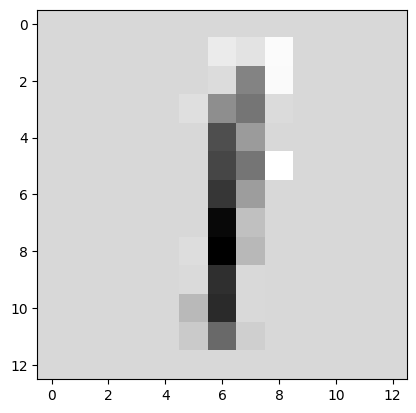

In [17]:
plt.imshow(pool.detach()[0,9,:,:],cmap='gray')
plt.show()

In [18]:
image.shape

torch.Size([1, 28, 28])

In [19]:
img = image.squeeze()
img.shape

torch.Size([28, 28])

In [21]:
flat_img = img.view(28*28)
flat_img.shape

torch.Size([784])

In [22]:
result = nn.Linear(784,5)(flat_img)
softmax = F.softmax(result)
softmax

<ipython-input-22-895a3e2cb76f>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax = F.softmax(result)


tensor([0.1898, 0.1306, 0.3086, 0.1613, 0.2098], grad_fn=<SoftmaxBackward0>)

In [23]:
data = torch.randn(4,3,28,28)
layer = nn.Conv2d(3,20,3,1)
out = layer(data)
result = F.relu(out)
result.shape

torch.Size([4, 20, 26, 26])

In [24]:
class Model(nn.Module):
    def __init__(self,input_channel):
        super(Model, self).__init__()
        self.layer = nn.Conv2d(input_channel,20,3,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.sigmoid(x)
        return x

model = Model(3)
model

Model(
  (layer): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
  (sigmoid): Sigmoid()
)

In [26]:
list(model.children())

[Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1)), Sigmoid()]

In [27]:
list(model.modules())

[Model(
   (layer): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
   (sigmoid): Sigmoid()
 ),
 Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1)),
 Sigmoid()]

In [28]:
class Model(nn.Module):
    def __init__(self,input_channel):
        super(model,self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(input_channel,0,3,1),
            nn.ReLu(),
            nn.MaxPool2d(2)
        )

        self.layer1 = nn.Sequential(
            nn.Conv2d(20,40,3,1),
            nn.ReLu(),
            nn.MaxPool2d(2)
        )

    def forward(self,x):
        x = self.layer(x)
        return x